In [53]:
import os
print(os.getcwd())

d:\sp500_prediction\버전2(SPY)\preprocessing


In [54]:
import pandas as pd

file_path = "../data/output_data/final_merged_y_close.csv"
df = pd.read_csv(file_path,index_col="Date", parse_dates=["Date"])

In [55]:
import numpy as np

# 1. 'y_target'에 로그 변환을 적용하여 'y_target_log' 생성
df['y_target_log'] = np.log(df['y_target'])

# 2. 타겟(y) 정의
y = df['y_target_log']

# 3. X 정의 (모든 피처 포함)
X = df.drop(columns=['y_target', 'y_target_log'])

In [56]:
def auto_log_transform_by_value(df):
    """
    데이터프레임(df)을 입력받아 숫자형 변수의 값 범위에 따라
    로그 변환(log 또는 log1p)을 자동으로 수행합니다.

    - 음수 값이 포함된 열은 변환하지 않습니다.
    - 0과 1 사이의 값(0 포함)이 포함된 열은 log1p (log(x+1)) 변환을 사용합니다.
    - 모든 값이 1 이상인 열은 log (log(x)) 변환을 사용합니다.

    Args:
        df (pd.DataFrame): 원본 데이터프레임

    Returns:
        pd.DataFrame: 변환된 데이터프레임
        list: 변환이 적용된 열의 이름 리스트
    """

    print(f"--- 자동 로그 변환 시작 (값 범위 기반) ---")

    # 원본 수정을 방지하기 위해 데이터프레임 복사
    df_transformed = df.copy()
    transformed_cols = []

    # 숫자형(numeric) 열만 선택
    numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        col_data = df_transformed[col]
        col_min = col_data.min()

        # 1. NaN 값은 변환 전에 제외하고 최소값을 계산 (pandas의 .min() 기본 동작)
        # 만약 NaN을 0으로 간주하고 싶다면, .fillna(0).min()을 사용할 수 있습니다.

        # 2. 음수 값 확인
        if col_min < 0:
            print(f"[{col}] 건너뜀: 음수 값이 포함되어 있습니다. (최소값: {col_min:.2f})")
            continue

        # 3. 0 또는 1 미만의 양수 값 확인 (log1p 대상)
        elif col_min < 1:
            # 0이 포함되거나 (col_min == 0), 0과 1 사이의 값이 포함된 경우 (0 < col_min < 1)
            # log(x+1) 변환 적용
            df_transformed[col] = np.log1p(col_data)
            transformed_cols.append(col)
            print(f"[{col}] 변환 적용 (log1p): 최소값={col_min:.2f} (< 1)")

        # 4. 모든 값이 1 이상인 경우 (log 대상)
        else: # col_min >= 1
            # log(x) 변환 적용
            df_transformed[col] = np.log(col_data)
            transformed_cols.append(col)
            print(f"[{col}] 변환 적용 (log): 최소값={col_min:.2f} (>= 1)")


    print(f"--- 총 {len(transformed_cols)}개 열 변환 완료 ---")

    return df_transformed, transformed_cols

In [57]:
X_transformed, transformed_list = auto_log_transform_by_value(X)
print(X_transformed[transformed_list].skew())

--- 자동 로그 변환 시작 (값 범위 기반) ---
[SPY_High] 변환 적용 (log): 최소값=380.57 (>= 1)
[SPY_Low] 변환 적용 (log): 최소값=373.61 (>= 1)
[SPY_Volume] 변환 적용 (log): 최소값=26048700.00 (>= 1)
[SPY_Volatility] 변환 적용 (log1p): 최소값=0.77 (< 1)
[DX-Y.NYB_Close] 변환 적용 (log): 최소값=96.63 (>= 1)
[GC=F_Close] 변환 적용 (log): 최소값=1676.50 (>= 1)
[GLD_Close] 변환 적용 (log): 최소값=155.85 (>= 1)
[SHY_Close] 변환 적용 (log): 최소값=80.51 (>= 1)
[TLT_Close] 변환 적용 (log): 최소값=82.77 (>= 1)
[^VIX_Close] 변환 적용 (log): 최소값=11.86 (>= 1)
[GC=F_Volume] 변환 적용 (log1p): 최소값=0.00 (< 1)
[GLD_Volume] 변환 적용 (log): 최소값=1436500.00 (>= 1)
[SHY_Volume] 변환 적용 (log): 최소값=1272200.00 (>= 1)
[TLT_Volume] 변환 적용 (log): 최소값=9486100.00 (>= 1)
[^VIX_Volatility] 변환 적용 (log1p): 최소값=0.24 (< 1)
[DX-Y.NYB_Volatility] 변환 적용 (log1p): 최소값=0.19 (< 1)
[TLT_Volatility] 변환 적용 (log1p): 최소값=0.24 (< 1)
[GC=F_Volatility] 변환 적용 (log1p): 최소값=0.00 (< 1)
[GLD_Volatility] 변환 적용 (log1p): 최소값=0.44 (< 1)
[SHY_Volatility] 변환 적용 (log1p): 최소값=0.02 (< 1)
[WTI_Spot] 변환 적용 (log): 최소값=58.29 (>= 1)
[PAYEMS] 변환

In [58]:
df.head()

,SPY_High,SPY_Low,SPY_Volume,SPY_Volatility,DX-Y.NYB_Close,GC=F_Close,GLD_Close,SHY_Close,TLT_Close,^VIX_Close,...,PAYEMS,UNRATE,TNX (%),기준금리,SPY_PER,SPY_PBR,CPIAUCSL,y_target,SPY_Premium_pct,y_target_log
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-07,380.570007,375.529999,68286900,5.040009,110.120003,1676.500000,155.850006,80.610001,93.279999,24.350000,...,154210.0,3.6,0.4214,4.0,22.07,3.6,298.708,379.950012,0.034974,5.940040
2022-11-08,385.119995,377.720001,84641100,7.399994,109.620003,1712.099976,159.449997,80.690002,94.300003,25.540001,...,154210.0,3.6,0.4126,4.0,22.07,3.6,298.708,382.000000,0.015730,5.945421
2022-11-09,381.140015,373.609985,78495500,7.530029,110.550003,1710.099976,158.649994,80.820000,94.610001,26.090000,...,154210.0,3.6,0.4151,4.0,22.07,3.6,298.708,374.130005,0.006895,5.924603
2022-11-10,395.040009,385.640015,141455800,9.399994,108.209999,1750.300049,163.479996,81.260002,98.250000,23.530001,...,154210.0,3.6,0.3829,4.0,22.07,3.6,297.979,394.690002,-0.029572,5.978101
2022-11-11,399.350006,393.609985,93839900,5.740021,106.290001,1766.000000,164.559998,81.239998,97.889999,22.520000,...,154210.0,3.6,0.3813,4.0,22.07,3.6,297.979,398.510010,0.017100,5.987733


In [59]:
X_transformed['y_target_log'] = df['y_target_log']

In [60]:
X_transformed.head()

,SPY_High,SPY_Low,SPY_Volume,SPY_Volatility,DX-Y.NYB_Close,GC=F_Close,GLD_Close,SHY_Close,TLT_Close,^VIX_Close,...,WTI_Spot,PAYEMS,UNRATE,TNX (%),기준금리,SPY_PER,SPY_PBR,CPIAUCSL,SPY_Premium_pct,y_target_log
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-07,5.941670,5.928338,18.039229,1.798405,4.701571,7.424464,5.048894,4.389623,4.535606,3.192532,...,4.519612,11.946071,1.280934,0.351642,1.386294,3.094219,1.280934,5.699467,0.034974,5.940040
2022-11-08,5.953555,5.934153,18.253931,2.128231,4.697020,7.445476,5.071730,4.390615,4.546481,3.240246,...,4.486387,11.946071,1.280934,0.345432,1.386294,3.094219,1.280934,5.699467,0.015730,5.945421
2022-11-09,5.943167,5.923212,18.178552,2.143593,4.705468,7.444307,5.066700,4.392224,4.549763,3.261552,...,4.451902,11.946071,1.280934,0.347200,1.386294,3.094219,1.280934,5.699467,0.006895,5.924603
2022-11-10,5.978987,5.954904,18.767498,2.341805,4.684074,7.467543,5.096691,4.397654,4.587515,3.158276,...,4.460376,11.946071,1.280934,0.324183,1.386294,3.094219,1.280934,5.697023,-0.029572,5.978101
2022-11-11,5.989838,5.975361,18.357101,1.908063,4.666171,7.476472,5.103275,4.397408,4.583844,3.114404,...,4.490208,11.946071,1.280934,0.323025,1.386294,3.094219,1.280934,5.697023,0.017100,5.987733


In [61]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2022-11-07 to 2025-11-07
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_High             754 non-null    float64
 1   SPY_Low              754 non-null    float64
 2   SPY_Volume           754 non-null    float64
 3   SPY_Volatility       754 non-null    float64
 4   DX-Y.NYB_Close       754 non-null    float64
 5   GC=F_Close           754 non-null    float64
 6   GLD_Close            754 non-null    float64
 7   SHY_Close            754 non-null    float64
 8   TLT_Close            754 non-null    float64
 9   ^VIX_Close           754 non-null    float64
 10  GC=F_Volume          754 non-null    float64
 11  GLD_Volume           754 non-null    float64
 12  SHY_Volume           754 non-null    float64
 13  TLT_Volume           754 non-null    float64
 14  ^VIX_Volatility      754 non-null    float64
 15  DX-Y.NYB_Volatility  

In [62]:
X_transformed.describe()

,SPY_High,SPY_Low,SPY_Volume,SPY_Volatility,DX-Y.NYB_Close,GC=F_Close,GLD_Close,SHY_Close,TLT_Close,^VIX_Close,...,WTI_Spot,PAYEMS,UNRATE,TNX (%),기준금리,SPY_PER,SPY_PBR,CPIAUCSL,SPY_Premium_pct,y_target_log
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,...,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,6.236271,6.225527,18.010557,1.762082,4.635661,7.784983,5.405167,4.405600,4.542954,2.830076,...,4.301782,11.966536,1.369064,0.345590,1.598589,3.244211,1.488951,5.740264,0.006294,6.231434
std,0.166625,0.167697,0.351712,0.418872,0.027958,0.235091,0.231809,0.008101,0.067373,0.218561,...,0.099817,0.010434,0.071537,0.024890,0.101316,0.080945,0.109489,0.024827,0.044557,0.167137
min,5.941670,5.923212,17.075478,0.570973,4.570889,7.424464,5.048894,4.388381,4.416066,2.473171,...,4.065431,11.946071,1.252763,0.284201,1.386294,3.094219,1.280934,5.697023,-0.173555,5.924603
25%,6.081248,6.072393,17.811310,1.475334,4.618851,7.581898,5.204831,4.398300,4.488412,2.661832,...,4.234215,11.958739,1.308333,0.326512,1.504077,3.175133,1.381282,5.717777,-0.010146,6.078599
50%,6.259945,6.249531,18.039960,1.729881,4.639861,7.753044,5.373030,4.406231,4.531039,2.809101,...,4.304808,11.969261,1.386294,0.350657,1.609438,3.271089,1.545433,5.743346,0.006451,6.253771
75%,6.381998,6.369880,18.240013,1.997417,4.654436,7.962250,5.576224,4.412435,4.597088,2.957771,...,4.377862,11.974260,1.435085,0.363166,1.704748,3.299534,1.597365,5.760802,0.022400,6.375710
max,6.536257,6.529171,19.363073,4.035479,4.705468,8.374800,5.999309,4.422329,4.695651,3.957570,...,4.539778,11.980050,1.458615,0.404665,1.704748,3.355502,1.611436,5.781879,0.900425,6.532902


In [63]:
file_path = '/sp500_prediction/버전2(SPY)/data/output_data/log.csv'
X_transformed.to_csv(file_path)

- EDA

In [64]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_name = 'Malgun Gothic' 

# 폰트 설정
plt.rc('font', family=font_name)

# 마이너스 기호가 깨지는 거 방지
plt.rcParams['axes.unicode_minus'] = False

print("VS Code Matplotlib 한글 설정 완료 (NanumGothic)")

VS Code Matplotlib 한글 설정 완료 (NanumGothic)


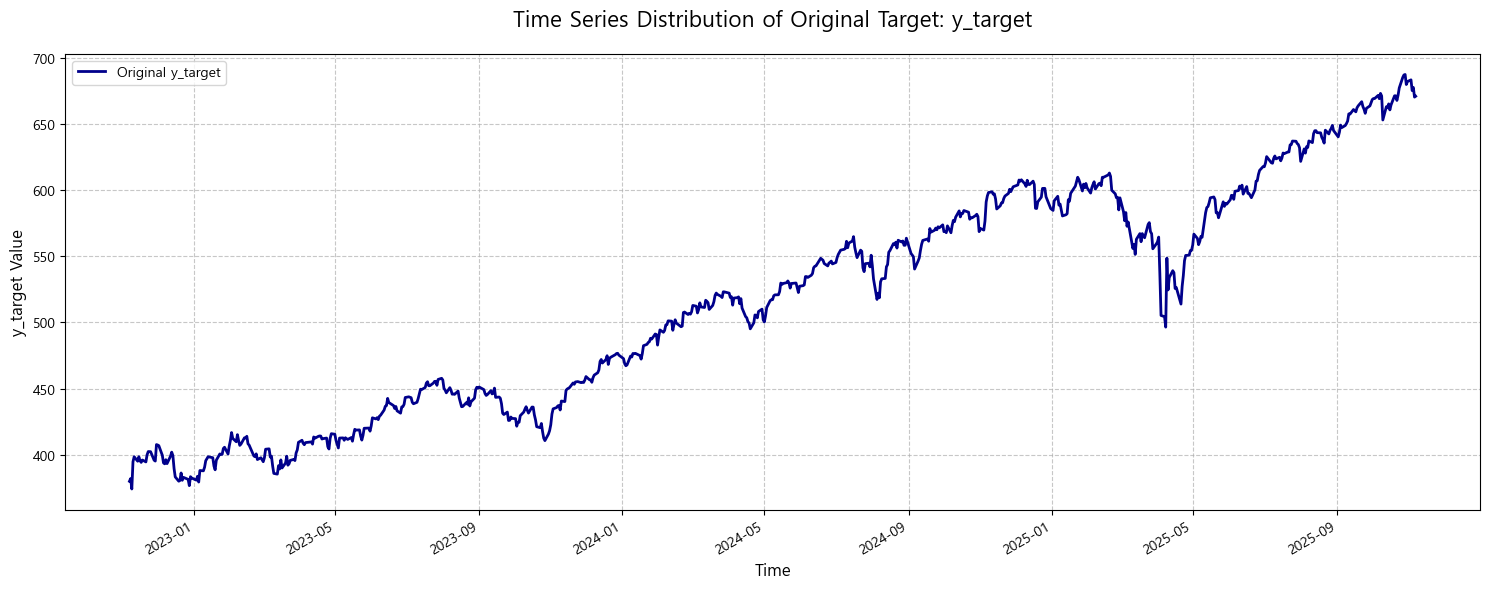

In [65]:
# 원본 타겟 변수 (y_target) 시계열 꺾은선 그래프 그리기
plt.figure(figsize=(15, 6))

# 원본 타겟 변수 플롯
df['y_target'].plot(linewidth=2, color='darkblue')

plt.title('Time Series Distribution of Original Target: y_target', fontsize=16, pad=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('y_target Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Original y_target'], loc='upper left')

plt.tight_layout()
plt.show()

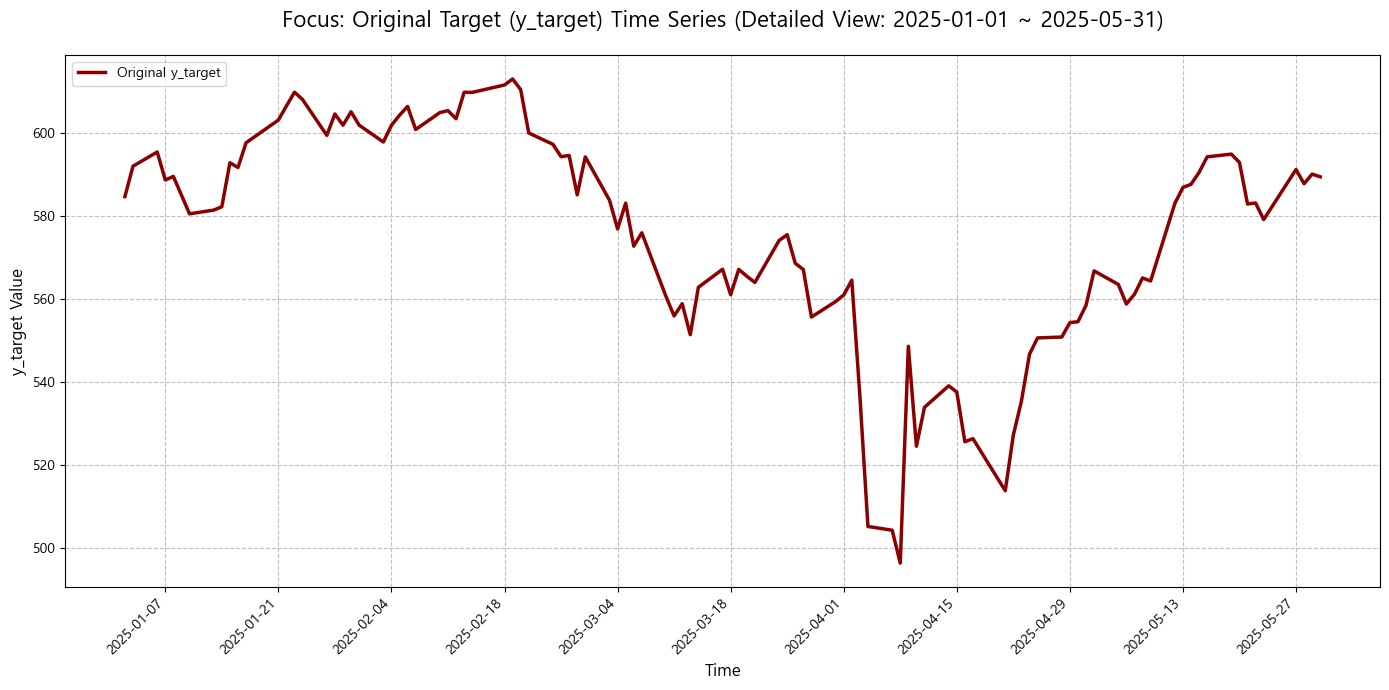

In [66]:
import matplotlib.dates as mdates

# 1. 원하는 기간으로 데이터 필터링
start_date = '2025-01-01'
end_date = '2025-05-31'
df_filtered = df.loc[start_date:end_date]


# ⭐️ y_target 시계열 꺾은선 그래프 그리기 - 주 단위 포맷 ⭐️
plt.figure(figsize=(14, 7))

df_filtered['y_target'].plot(linewidth=2.5, color='darkred')

plt.title(f'Focus: Original Target (y_target) Time Series (Detailed View: {start_date} ~ {end_date})', fontsize=16, pad=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('y_target Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Original y_target'], loc='upper left')

# X축 주(週) 단위 설정 및 포맷 지정
ax = plt.gca()
# 주(週)마다 틱 표시
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# 월(月)을 라벨로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# 서브 틱(보조 틱)을 일 단위로 표시 (데이터 포인트가 많다면 유용)
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

plt.xticks(rotation=45, ha='right') # 라벨이 겹치지 않도록 회전
plt.tight_layout()
plt.show()

- 2025년 4월 2일 \:도널드 트럼프 미국 대통령이 시작한 관세 부과와 그로 인한 무역 전쟁의 공포가 주가 하락의 직접적인 원인

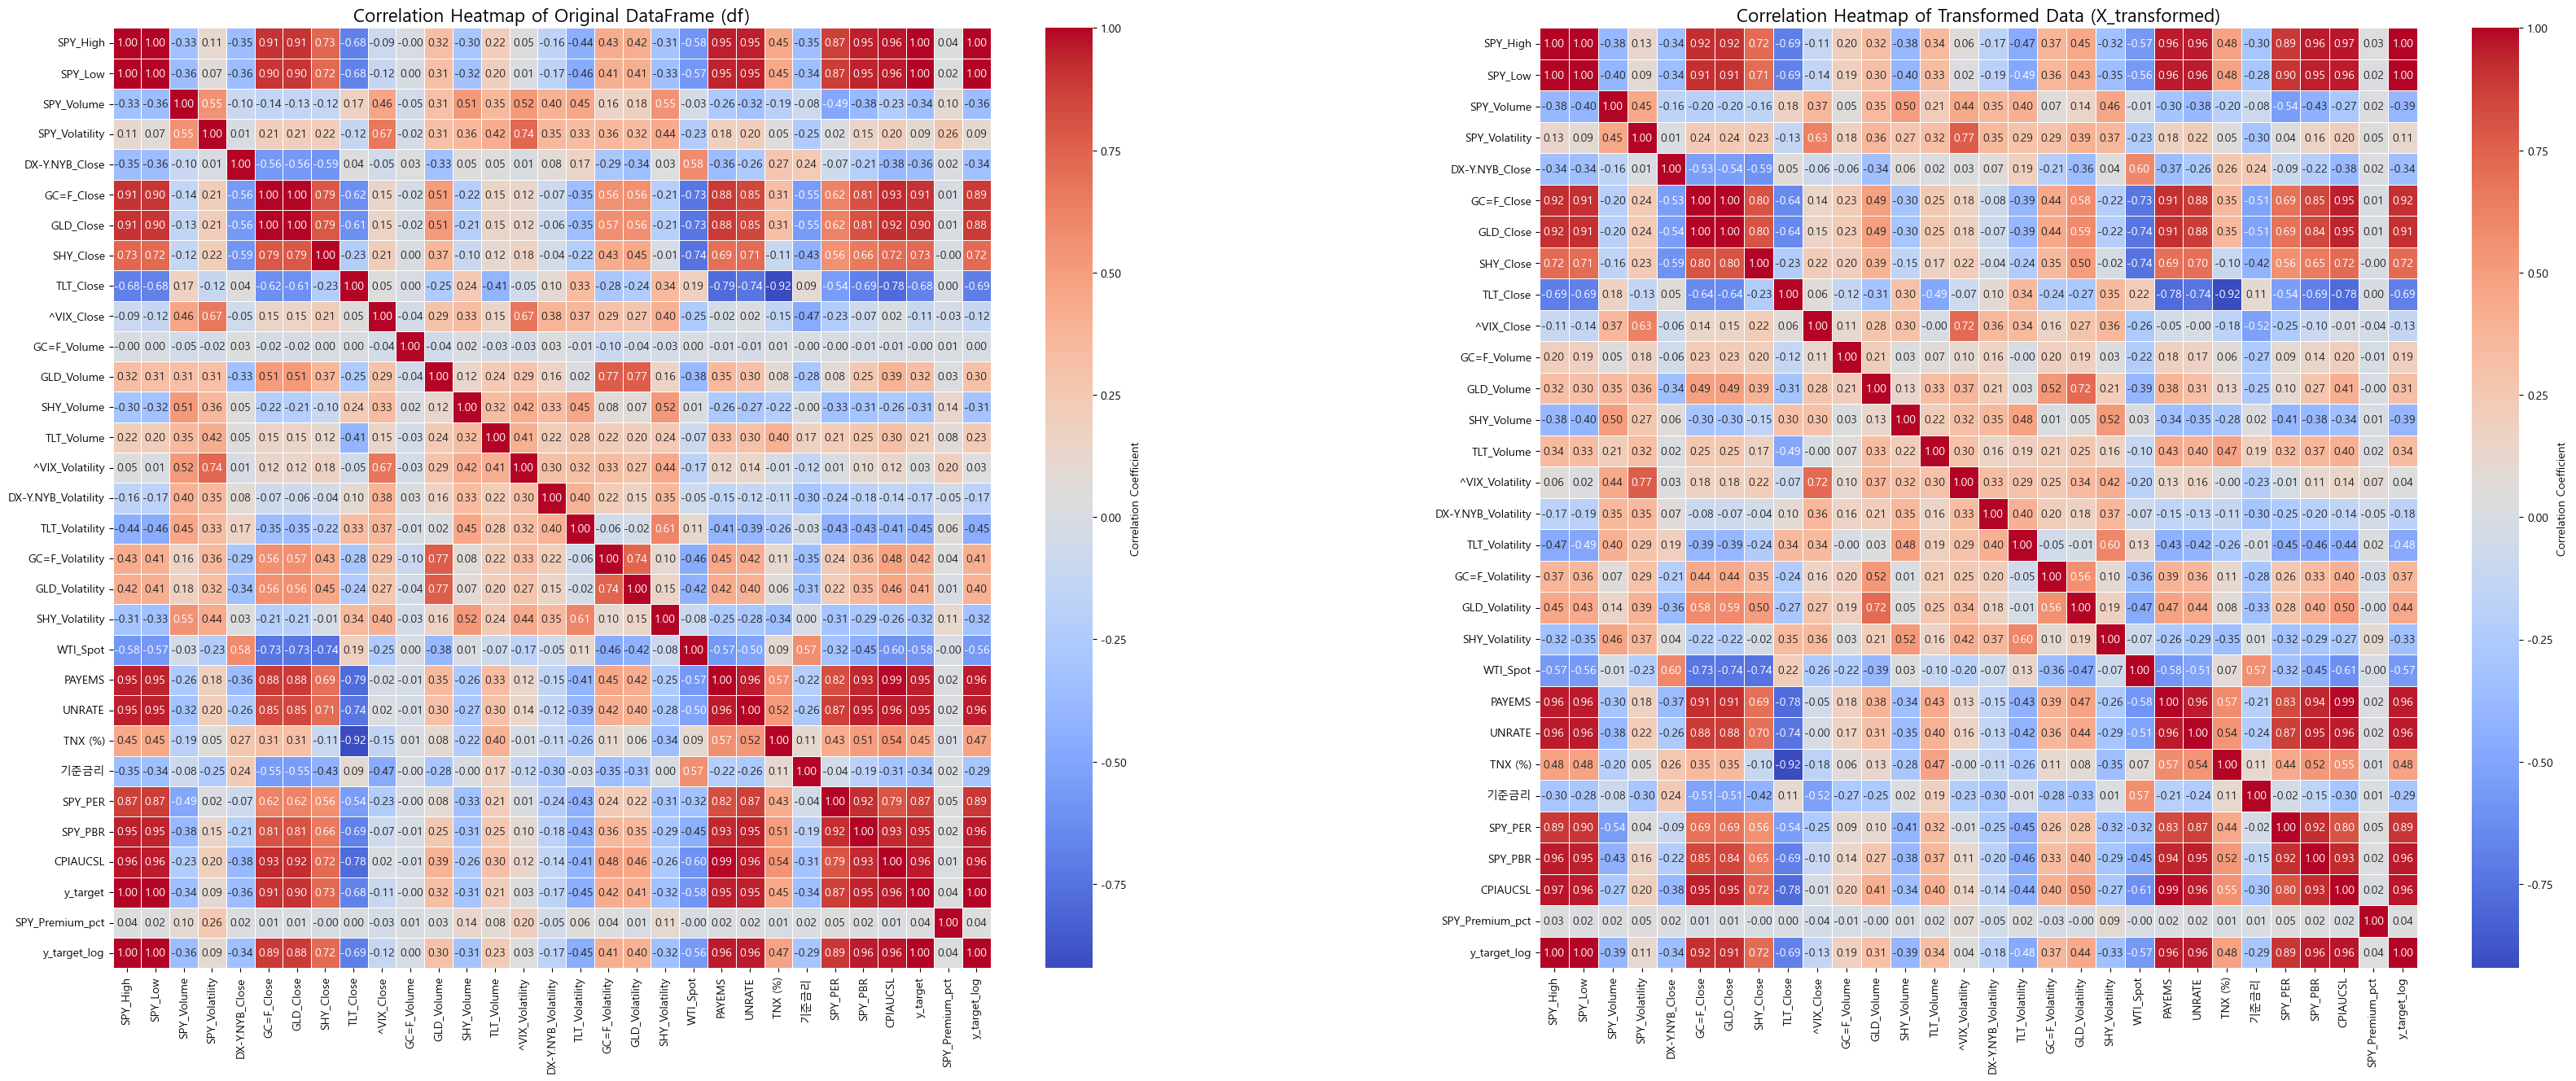

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['number'])
numeric_X_transformed = X_transformed.select_dtypes(include=['number'])

# 2. 상관 관계 행렬 계산
correlation_matrix_df = numeric_df.corr()
correlation_matrix_X_transformed = numeric_X_transformed.corr()

# 3. Matplotlib의 subplots을 사용하여 1행 2열의 Figure와 Axes 생성
# figsize는 두 개의 히트맵을 수용할 수 있도록 가로 크기를 충분히 크게 설정합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 15)) # 1행 2열, 전체 그림 크기 설정
plt.subplots_adjust(wspace=0.3) # 두 서브플롯 사이의 가로 간격 조정

# --- 첫 번째 히트맵 (df) ---
sns.heatmap(
    correlation_matrix_df,
    ax=ax1,              # 첫 번째 서브플롯(ax1)에 할당
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
ax1.set_title('Correlation Heatmap of Original DataFrame (df)', fontsize=16)

# --- 두 번째 히트맵 (X_transformed) ---
sns.heatmap(
    correlation_matrix_X_transformed,
    ax=ax2,              # 두 번째 서브플롯(ax2)에 할당
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
ax2.set_title('Correlation Heatmap of Transformed Data (X_transformed)', fontsize=16)

plt.show()

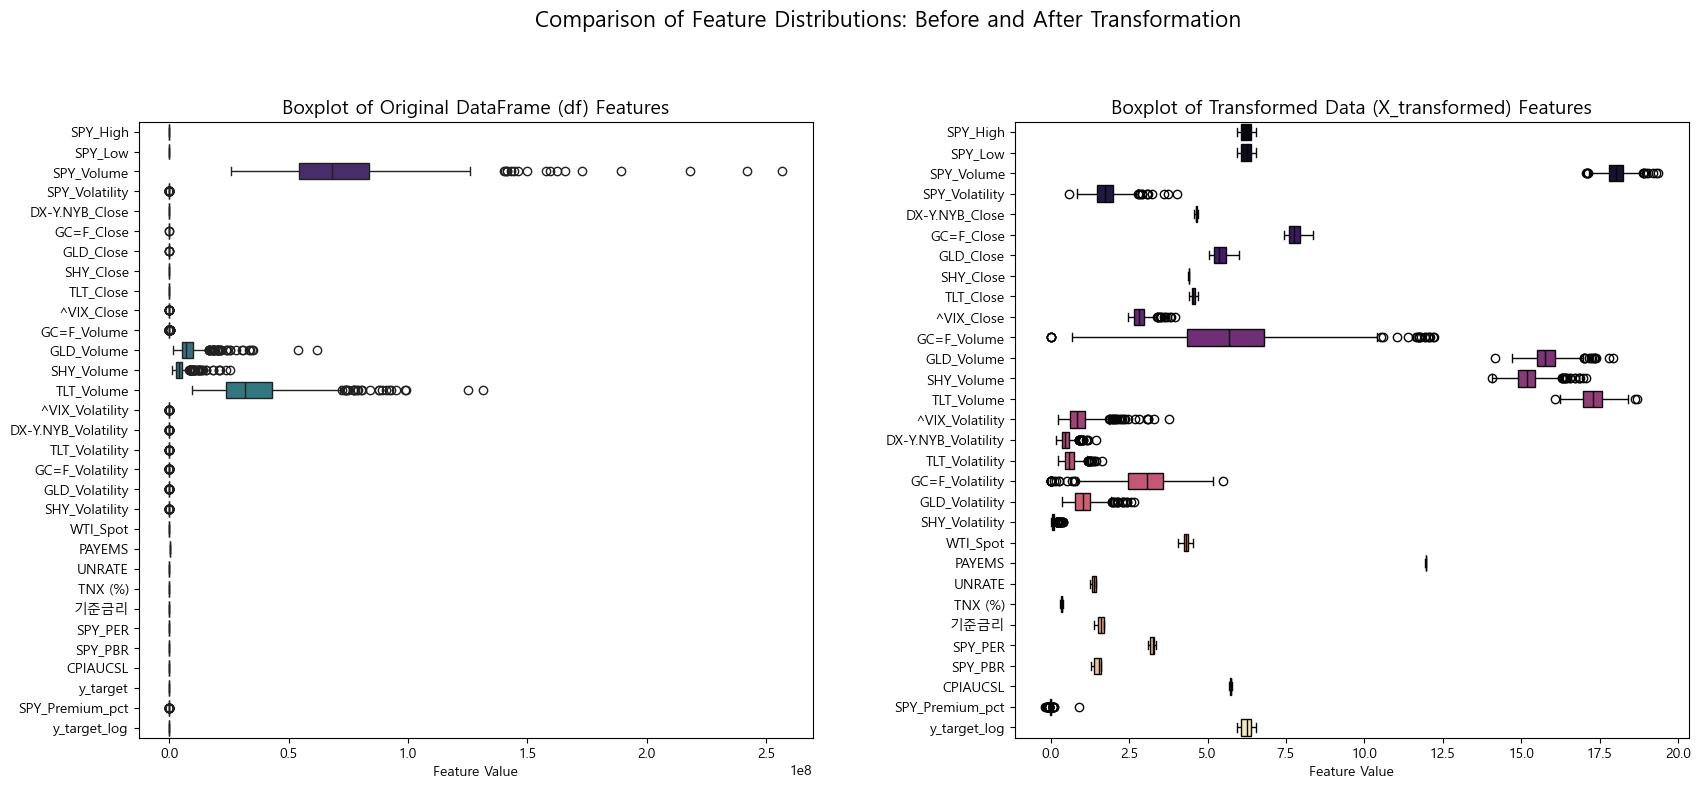

In [68]:
# 1. 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['number'])
numeric_X_transformed = X_transformed.select_dtypes(include=['number'])

# 2. Matplotlib의 subplots을 사용하여 1행 2열의 Figure와 Axes 생성
# df는 컬럼 수가 많다고 가정하고 가로 크기(20)를 더 크게 설정했습니다.
# X_transformed의 컬럼 수에 따라 크기를 조정해야 합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.3) # 두 서브플롯 사이의 가로 간격 조정

# --- 첫 번째 박스플롯 (df) ---
sns.boxplot(
    data=numeric_df,
    ax=ax1,              # 첫 번째 서브플롯(ax1)에 할당
    orient='h',          # 박스플롯을 수평으로 표시 (가독성 향상)
    palette='viridis'    # 색상 팔레트 설정
)
ax1.set_title('Boxplot of Original DataFrame (df) Features', fontsize=14)
ax1.set_xlabel('Feature Value') # x축 레이블 설정

# --- 두 번째 박스플롯 (X_transformed) ---
sns.boxplot(
    data=numeric_X_transformed,
    ax=ax2,              # 두 번째 서브플롯(ax2)에 할당
    orient='h',          # 박스플롯을 수평으로 표시
    palette='magma'      # 다른 색상 팔레트 설정
)
ax2.set_title('Boxplot of Transformed Data (X_transformed) Features', fontsize=14)
ax2.set_xlabel('Feature Value') # x축 레이블 설정

# 전체 Figure의 제목을 추가할 수도 있습니다.
fig.suptitle('Comparison of Feature Distributions: Before and After Transformation', fontsize=16, y=1.02)

plt.show()

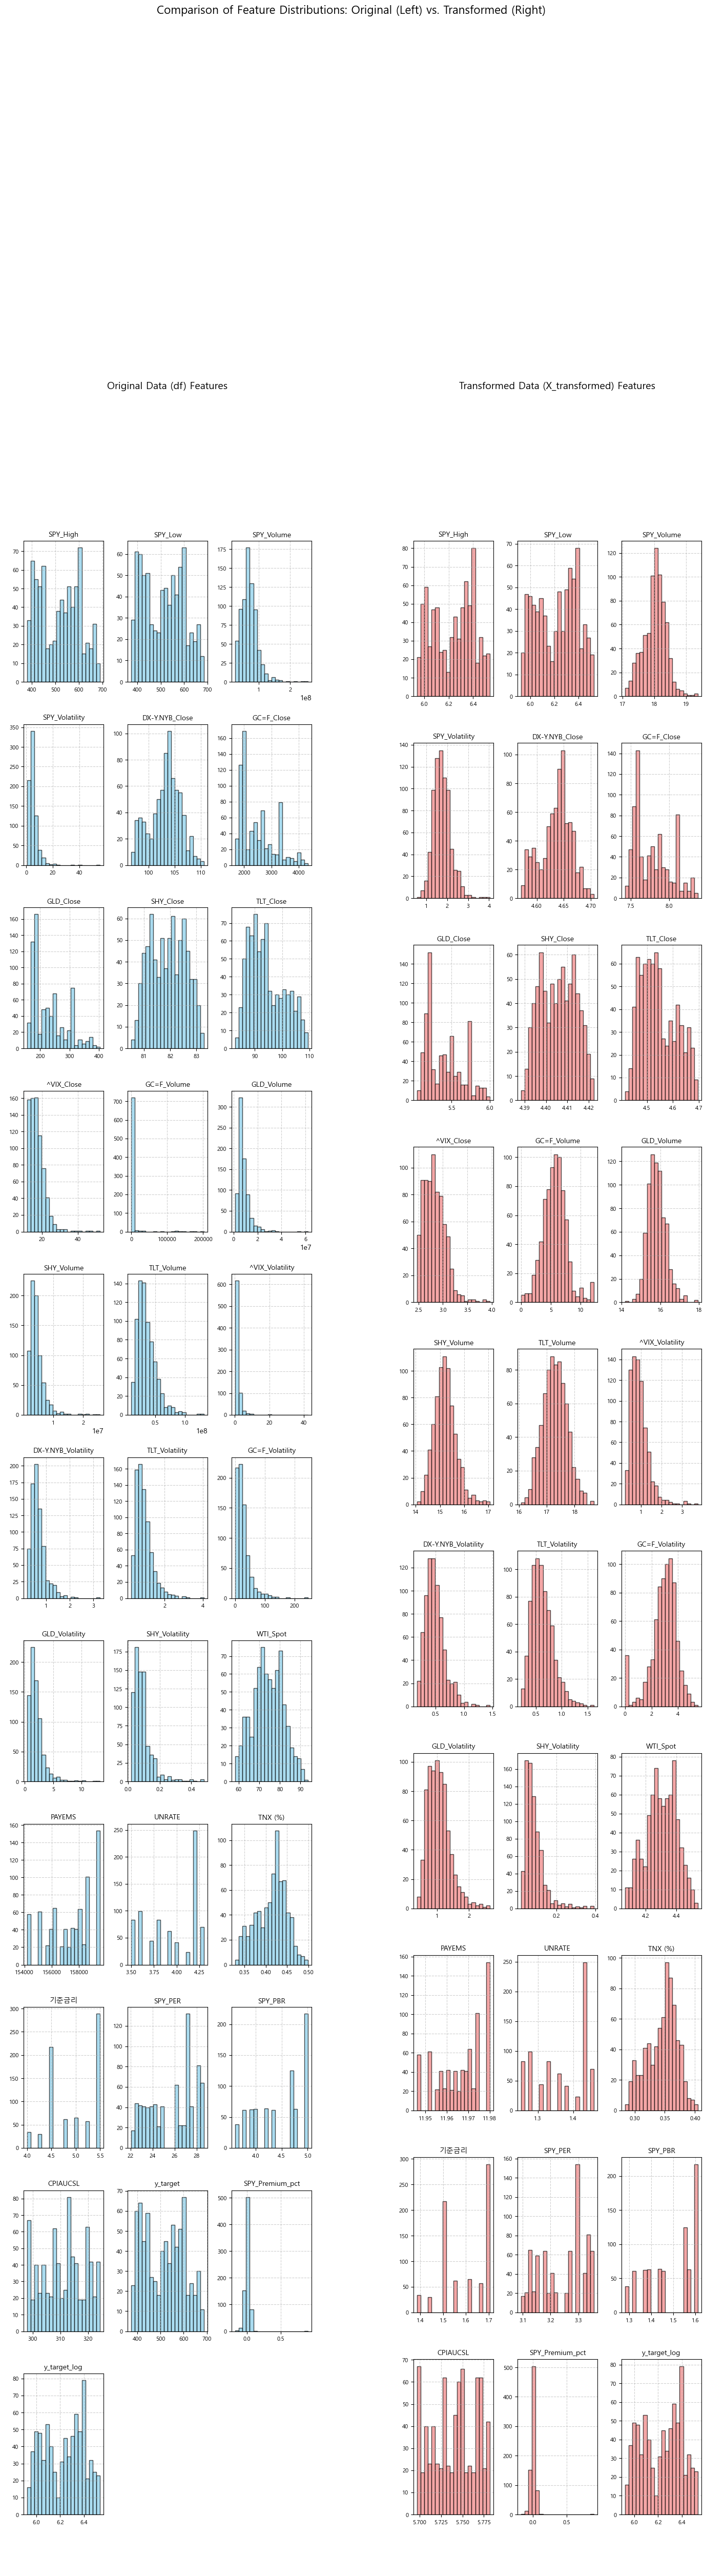

In [69]:
import math
from matplotlib.gridspec import GridSpec

# 1. 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['number'])
numeric_X_transformed = X_transformed.select_dtypes(include=['number'])

# 2. 각 데이터프레임의 서브플롯 그리드 크기 계산
MAX_COLS = 3

# df
df_cols = numeric_df.columns
df_rows = math.ceil(len(df_cols) / MAX_COLS)
df_total_plots = len(df_cols)

# X_transformed
xt_cols = numeric_X_transformed.columns
xt_rows = math.ceil(len(xt_cols) / MAX_COLS)
xt_total_plots = len(xt_cols)

# 3. Figure 및 GridSpec 설정
fig = plt.figure(figsize=(18, 5 * max(df_rows, xt_rows)))
fig.suptitle('Comparison of Feature Distributions: Original (Left) vs. Transformed (Right)', fontsize=16, y=1.02)

# 전체 Figure를 1행 2열로 나누는 GridSpec 생성
gs_main = GridSpec(1, 2, figure=fig, wspace=0.2)

# --- A. 왼쪽 영역 (df) 설정 ---
ax_left = fig.add_subplot(gs_main[0, 0])
ax_left.axis('off') # 메인 영역 자체의 축은 숨김
ax_left.set_title('Original Data (df) Features', fontsize=14, pad=15)

# df의 히스토그램을 위한 내부 GridSpec 생성
gs_df = GridSpec(df_rows, MAX_COLS, figure=fig, wspace=0.3, hspace=0.3)

# ⭐️⭐️⭐️ 오류 수정: gs_main[0, 0].get_position()에 'figure=fig' 인수를 추가
main_left_pos = gs_main[0, 0].get_position(figure=fig)

gs_df.update(left=main_left_pos.x0 + 0.02,
             right=main_left_pos.x1 - 0.02,
             top=main_left_pos.y1 - 0.05,
             bottom=main_left_pos.y0 + 0.02)

# df 히스토그램 그리기
for i, col in enumerate(df_cols):
    row_idx = i // MAX_COLS
    col_idx = i % MAX_COLS

    # GridSpec에서 서브플롯 영역 가져오기
    ax = fig.add_subplot(gs_df[row_idx, col_idx])

    # 히스토그램 그리기
    ax.hist(numeric_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)


# --- B. 오른쪽 영역 (X_transformed) 설정 ---
ax_right = fig.add_subplot(gs_main[0, 1])
ax_right.axis('off') # 메인 영역 자체의 축은 숨김
ax_right.set_title('Transformed Data (X_transformed) Features', fontsize=14, pad=15)

# X_transformed의 히스토그램을 위한 내부 GridSpec 생성
gs_xt = GridSpec(xt_rows, MAX_COLS, figure=fig, wspace=0.3, hspace=0.3)

# gs_main[0, 1].get_position()에 'figure=fig' 인수를 추가
main_right_pos = gs_main[0, 1].get_position(figure=fig)

gs_xt.update(left=main_right_pos.x0 + 0.02,
             right=main_right_pos.x1 - 0.02,
             top=main_right_pos.y1 - 0.05,
             bottom=main_right_pos.y0 + 0.02)


# X_transformed 히스토그램 그리기
for i, col in enumerate(xt_cols):
    row_idx = i // MAX_COLS
    col_idx = i % MAX_COLS

    ax = fig.add_subplot(gs_xt[row_idx, col_idx])

    # 히스토그램 그리기
    ax.hist(numeric_X_transformed[col], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)

    # 남는 빈 공간의 축 숨기기 (df와 xt의 컬럼 수가 다를 경우)
    if i >= xt_total_plots:
        ax.axis('off')

plt.show()